In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from dtaidistance import dtw, clustering
from sklearn.cluster import KMeans
import plotly.express as px

In [3]:
def display_all(df):
    pd.set_option('display.max_rows', None)
    display(df)
    pd.reset_option('display.max_rows')

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')
df.head()

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],NO3 [umol/L],NO2 [umol/L],NH4 [umol/L],E [/m],CHLFa [ug/l],Q,PAR [J/m2d],PAR [kJ/m2d],kPAR_7d,kPAR_14d,DIN,DIN:SRP,DIN:SI,SRP:SI,IM [Jm2d],Agl,Dbr,Ezo,Gde,Oau,Omo,Orh,Osi,Ram,Rse,Tec,Tle,Tni,Tro,Dle,Etr,Gfl,Gsp,Nsc,Pbi,Pbr,Pha,Stu,Kgl,Oro,Tor,Cdi,Cra,Ore,Ata,Cfu,Cgr,Lan,Pcl,Pmi,Pos,Pse,Cden,Aco,Dip,Csu,Mnu,Pco,Cdeb,Cwa,Pba,Dac,Ptr,Lun,Nsi,Rst,Pst,Acn,Tno,Ccu,Pan,Gfa,Hta,Dsp,Psu,Cei,Ndi,Cda,Dro,Cha,Pac,Cau,Coc,Pte,Edu,Mpe,Pde,Plo,Dpu,Rte,Fja,Hak,Mhe,Dno,Dat,interpolated_columns
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,37.571429,3.714286,14.071429,0.751180,1.3,100,450000.0,450.0,513.000000,NaN,55.357143,33.648459,2.743363,0.081530,4.496419e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,19.803571,27.37,1.177419,7.9,63.428571,2.892857,11.357143,11.391822,11.2,603,2713500.0,2713.5,1737.000000,1497.857143,77.678571,87.278775,3.945211,0.059029,2.713500e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['SiO2 [umol/L]', 'PO4 [umol/L]', 'pH [DIMSLS]..."
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,89.285714,2.071429,8.642857,1.364080,21.1,543,2443500.0,2443.5,2949.428571,2865.857143,100.000000,140.909091,5.147059,0.036528,2.443494e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,40.000000,2.000000,6.428571,1.037580,25.0,1491,6709500.0,6709.5,6508.285714,5926.821429,48.428571,60.051429,7.704545,0.128299,6.709149e+06,3.271842,4.748777,3.572755,3.572755,4.313065,3.748808,3.572755,3.873785,3.271842,3.271842,3.572755,3.572755,4.669596,4.475787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,0.214286,0.142857,1.928571,0.738760,10.2,1290,5805000.0,5805.0,9470.571429,9416.892857,2.285714,1.968254,1.333333,0.677419,5.799802e+06,4.669596,NaN,3.271842,3.970672,NaN,2.670246,1.973128,NaN,NaN,5.192467,NaN,NaN,NaN,4.012035,NaN,NaN,NaN,3.669689,3.271842,3.669689,NaN,NaN,NaN,1.973128,2.816241,1.973128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [5]:
df.columns

Index(['LOC_CODE', 'DATUM', 'TIJD', 'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]',
       'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
       ...
       'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat',
       'interpolated_columns'],
      dtype='object', length=106)

In [6]:
rename_dict = {'Acn': 'Actinocyclus normanii', 'Aco': 'Actinocyclus octonarius', 'Agl': 'Asterionella glacialis', 'Ata': 'Alexandrium tamarense', 'Cau': 'Corymbellus aureus', 'Ccu': 'Chaetoceros curvisetus', 'Cda': 'Chaetoceros danicus', 'Cdeb': 'Chaetoceros debilis', 'Cden': 'Chaetoceros densus', 'Cdi': 'Chaetoceros didymus', 'Cei': 'Chaetoceros eibenii', 'Cfu': 'Ceratium fusus', 'Cgr': 'Coscinodiscus granii', 'Cha': 'Chattonella', 'Coc': 'Cochlodinium', 'Cra': 'Coscinodiscus radiatus', 'Csu': 'Chaetoceros subtilis', 'Cwa': 'Coscinodiscus wailesii', 'Dac': 'Dinophysis acuminata', 'Dat': 'Dinophysis acuta', 'Dbr': 'Ditylum brightwellii', 'Dip': 'Diploneis', 'Dle': 'Diplopsalis lenticula', 'Dno': 'Dinophysis norvegica', 'Dpu': 'Detonula pumila', 'Dro': 'Dinophysis rotundata', 'Dsp': 'Dictyocha speculum', 'Edu': 'Eunotogramma dubium', 'Etr': 'Ebria tripartita', 'Ezo': 'Eucampia zodiacus', 'Fja': 'Fibrocapsa japonica', 'Gde': 'Guinardia delicatula', 'Gfa': 'Gyrosigma fasciola', 'Gfl': 'Guinardia flaccida', 'Gsp': 'Gyrodinium spirale', 'Hak': 'Heterosigma akashiwo', 'Hta': 'Helicotheca tamesis', 'Kgl': 'Katodinium glaucum', 'Lan': 'Lauderia annulata', 'Lun': 'Lithodesmium undulatum', 'Mhe': 'Mediopyxis helysia', 'Mnu': 'Melosira nummuloides', 'Mpe': 'Mesoporos perforatus', 'Ndi': 'Navicula distans', 'Nsc': 'Noctiluca scintillans', 'Nsi': 'Nitzschia sigma', 'Oau': 'Odontella aurita', 'Omo': 'Odontella mobiliensis', 'Ore': 'Odontella regia', 'Orh': 'Odontella rhombus', 'Oro': 'Oblea rotunda', 'Osi': 'Odontella sinensis', 'Pac': 'Protoperidinium achromaticum', 'Pan': 'Pleurosigma angulatum', 'Pba': 'Prorocentrum balticum', 'Pbi': 'Protoperidinium bipes', 'Pbr': 'Protoperidinium brevipes', 'Pcl': 'Protoperidinium claudicans', 'Pco': 'Protoperidinium conicum', 'Pde': 'Protoperidinium depressum', 'Pha': 'Phaeocystis', 'Plo': 'Pyramimonas longicauda', 'Pmi': 'Prorocentrum micans', 'Pos': 'Podosira stelliger', 'Pse': 'Pseudopedinella', 'Pst': 'Protoperidinium steinii', 'Psu': 'Protoperidinium subinerme', 'Pte': 'Pterosperma', 'Ptr': 'Prorocentrum triestinum', 'Ram': 'Rhaphoneis amphiceros', 'Rse': 'Rhizosolenia setigera', 'Rst': 'Rhizosolenia styliformis', 'Rte': 'Roperia tesselata', 'Stu': 'Stephanopyxis turris', 'Tec': 'Thalassiosira eccentrica', 'Tle': 'Thalassiosira levanderi', 'Tni': 'Thalassionema nitzschioides', 'Tno': 'Thalassiosira nordenskioeldii', 'Tor': 'Torodinium robustum', 'Tro': 'Thalassiosira rotula'}

df.rename(columns=rename_dict, inplace=True)

In [7]:
phytoplankton_columns = df.columns[25:-2]
abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

display(phytoplankton_columns)

locations = list(df["LOC_CODE"].unique())
display(locations)

Index(['Asterionella glacialis', 'Ditylum brightwellii', 'Eucampia zodiacus',
       'Guinardia delicatula', 'Odontella aurita', 'Odontella mobiliensis',
       'Odontella rhombus', 'Odontella sinensis', 'Rhaphoneis amphiceros',
       'Rhizosolenia setigera', 'Thalassiosira eccentrica',
       'Thalassiosira levanderi', 'Thalassionema nitzschioides',
       'Thalassiosira rotula', 'Diplopsalis lenticula', 'Ebria tripartita',
       'Guinardia flaccida', 'Gyrodinium spirale', 'Noctiluca scintillans',
       'Protoperidinium bipes', 'Protoperidinium brevipes', 'Phaeocystis',
       'Stephanopyxis turris', 'Katodinium glaucum', 'Oblea rotunda',
       'Torodinium robustum', 'Chaetoceros didymus', 'Coscinodiscus radiatus',
       'Odontella regia', 'Alexandrium tamarense', 'Ceratium fusus',
       'Coscinodiscus granii', 'Lauderia annulata',
       'Protoperidinium claudicans', 'Prorocentrum micans',
       'Podosira stelliger', 'Pseudopedinella', 'Chaetoceros densus',
       'Actinocyclu

['DANTZGT',
 'DREISR',
 'GOERE6',
 'GROOTGND',
 'HANSWGL',
 'HUIBGOT',
 'LODSGT',
 'MARSDND',
 'NOORDWK10',
 'NOORDWK2',
 'NOORDWK20',
 'NOORDWK70',
 'ROTTMPT3',
 'ROTTMPT50',
 'ROTTMPT70',
 'SCHAARVODDL',
 'SOELKKPDOT',
 'TERSLG10',
 'TERSLG100',
 'TERSLG135',
 'TERSLG175',
 'TERSLG235',
 'TERSLG4',
 'VLISSGBISSVH',
 'WALCRN2',
 'WALCRN20',
 'WALCRN70']

In [8]:
phyto = df[['LOC_CODE', *phytoplankton_columns]]
display(phyto)


phyto_dist = phyto.groupby('LOC_CODE').sum().T.rename_axis('Species', axis='columns')
display(phyto_dist)
totals = phyto_dist.sum(axis=1)

normalized_phyto = phyto_dist.div(totals, axis=0)
display_all(normalized_phyto)



,LOC_CODE,Asterionella glacialis,Ditylum brightwellii,Eucampia zodiacus,Guinardia delicatula,Odontella aurita,Odontella mobiliensis,Odontella rhombus,Odontella sinensis,Rhaphoneis amphiceros,Rhizosolenia setigera,Thalassiosira eccentrica,Thalassiosira levanderi,Thalassionema nitzschioides,Thalassiosira rotula,Diplopsalis lenticula,Ebria tripartita,Guinardia flaccida,Gyrodinium spirale,Noctiluca scintillans,Protoperidinium bipes,Protoperidinium brevipes,Phaeocystis,Stephanopyxis turris,Katodinium glaucum,Oblea rotunda,Torodinium robustum,Chaetoceros didymus,Coscinodiscus radiatus,Odontella regia,Alexandrium tamarense,Ceratium fusus,Coscinodiscus granii,Lauderia annulata,Protoperidinium claudicans,Prorocentrum micans,Podosira stelliger,Pseudopedinella,Chaetoceros densus,Actinocyclus octonarius,Diploneis,Chaetoceros subtilis,Melosira nummuloides,Protoperidinium conicum,Chaetoceros debilis,Coscinodiscus wailesii,Prorocentrum balticum,Dinophysis acuminata,Prorocentrum triestinum,Lithodesmium undulatum,Nitzschia sigma,Rhizosolenia styliformis,Protoperidinium steinii,Actinocyclus normanii,Thalassiosira nordenskioeldii,Chaetoceros curvisetus,Pleurosigma angulatum,Gyrosigma fasciola,Helicotheca tamesis,Dictyocha speculum,Protoperidinium subinerme,Chaetoceros eibenii,Navicula distans,Chaetoceros danicus,Dinophysis rotundata,Chattonella,Protoperidinium achromaticum,Corymbellus aureus,Cochlodinium,Pterosperma,Eunotogramma dubium,Mesoporos perforatus,Protoperidinium depressum,Pyramimonas longicauda,Detonula pumila,Roperia tesselata,Fibrocapsa japonica,Heterosigma akashiwo,Mediopyxis helysia,Dinophysis norvegica
0,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DANTZGT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DANTZGT,3.271842,4.748777,3.572755,3.572755,4.313065,3.748808,3.572755,3.873785,3.271842,3.271842,3.572755,3.572755,4.669596,4.475787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DANTZGT,4.669596,NaN,3.271842,3.970672,NaN,2.670246,1.973128,NaN,NaN,5.192467,NaN,NaN,NaN,4.012035,NaN,NaN,NaN,3.669689,3.271842,3.669689,NaN,NaN,NaN,1.973128,2.816241,1.973128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,WALCRN70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Species,DANTZGT,DREISR,GOERE6,GROOTGND,HANSWGL,HUIBGOT,LODSGT,MARSDND,NOORDWK10,NOORDWK2,NOORDWK20,NOORDWK70,ROTTMPT3,ROTTMPT50,ROTTMPT70,SCHAARVODDL,SOELKKPDOT,TERSLG10,TERSLG100,TERSLG135,TERSLG175,TERSLG235,TERSLG4,VLISSGBISSVH,WALCRN2,WALCRN20,WALCRN70
Asterionella glacialis,795.368398,302.756563,411.786905,191.986923,651.153165,742.277616,386.668460,834.041281,610.363519,612.144231,338.780578,372.075914,368.003737,65.433836,42.648779,84.616451,178.071890,263.013633,75.784791,85.187570,87.649657,190.478079,269.370781,999.788770,475.844595,296.490322,241.786793
Ditylum brightwellii,414.147348,521.896339,299.286558,291.292969,600.681523,357.868564,436.894479,484.929576,599.194434,507.561806,385.685182,178.437890,121.794230,34.203832,36.882670,190.143215,365.245388,249.139072,49.324516,40.978044,41.071844,63.897755,173.273802,675.117328,345.989288,296.727795,206.014118
Eucampia zodiacus,285.620754,213.561875,282.008199,37.292388,268.119824,371.118118,284.380851,441.088702,836.078875,526.326354,527.916332,103.214980,158.991606,119.337754,109.436353,31.038514,52.566327,331.634232,48.429262,39.573081,19.690140,21.747990,179.722919,506.167120,301.387035,270.528749,128.698311
Guinardia delicatula,1181.818019,467.425924,702.759405,246.613464,916.405322,1133.375412,1037.917669,1247.974095,1955.552312,1160.433099,1184.623330,569.207054,498.510141,353.646473,300.637340,232.880492,176.509522,866.889920,312.950424,242.396762,198.648158,206.479357,557.714455,1417.620802,774.227228,737.855737,538.940098
Odontella aurita,1349.027468,97.709622,363.951576,920.154794,988.680589,826.874778,612.463965,755.482400,219.261444,338.761575,114.064442,140.927402,366.572519,34.202776,19.962000,302.917260,115.121525,163.283358,21.817379,23.039927,35.211928,47.390164,231.755211,1017.097049,442.482644,223.101417,133.881669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Roperia tesselata,18.528525,6.606082,13.681433,0.000000,15.344029,26.647729,3.647142,29.523158,62.116435,45.267562,56.564803,74.315593,18.221590,25.915451,24.265309,0.000000,0.000000,44.736480,37.807968,23.781934,10.430763,28.074144,30.402921,28.821678,15.019382,33.062535,42.401298
Fibrocapsa japonica,113.048731,43.662495,60.874210,10.205428,99.947163,217.684613,50.907602,212.139864,189.446783,152.758971,88.257784,25.750573,111.481612,43.077148,27.975040,7.464644,15.998161,58.244945,20.365086,16.856742,16.247692,1.780997,38.927827,192.843925,76.221256,43.003983,27.536844
Heterosigma akashiwo,16.354476,38.859390,28.550458,0.000000,13.804508,39.518899,39.152734,66.830433,80.761176,84.503920,52.887525,19.528741,3.749657,28.542615,13.482043,4.044111,80.037387,22.280344,3.307548,2.912353,2.835730,0.000000,6.194827,51.602715,21.698613,26.663282,3.477190
Mediopyxis helysia,531.958892,0.000000,3.602169,159.775554,11.637384,246.101539,128.953846,345.622347,0.000000,8.113316,3.488258,0.000000,136.855953,6.660894,2.369772,0.000000,4.048709,79.168117,0.000000,0.000000,0.000000,0.000000,0.000000,26.488149,2.047944,2.337257,2.223447


Species,DANTZGT,DREISR,GOERE6,GROOTGND,HANSWGL,HUIBGOT,LODSGT,MARSDND,NOORDWK10,NOORDWK2,NOORDWK20,NOORDWK70,ROTTMPT3,ROTTMPT50,ROTTMPT70,SCHAARVODDL,SOELKKPDOT,TERSLG10,TERSLG100,TERSLG135,TERSLG175,TERSLG235,TERSLG4,VLISSGBISSVH,WALCRN2,WALCRN20,WALCRN70
Asterionella glacialis,0.079748,0.030356,0.041288,0.019250,0.065288,0.074424,0.038769,0.083625,0.061198,0.061377,0.033968,0.037306,0.036898,0.006561,0.004276,0.008484,0.017854,0.026371,0.007599,0.008541,0.008788,0.019098,0.027008,0.100244,0.047711,0.029728,0.024243
Ditylum brightwellii,0.051978,0.065502,0.037563,0.036559,0.075390,0.044915,0.054833,0.060862,0.075203,0.063703,0.048406,0.022395,0.015286,0.004293,0.004629,0.023864,0.045841,0.031269,0.006191,0.005143,0.005155,0.008020,0.021747,0.084732,0.043424,0.037241,0.025856
Eucampia zodiacus,0.043971,0.032878,0.043415,0.005741,0.041277,0.057133,0.043780,0.067905,0.128713,0.081027,0.081272,0.015890,0.024477,0.018372,0.016848,0.004778,0.008093,0.051055,0.007456,0.006092,0.003031,0.003348,0.027668,0.077924,0.046398,0.041648,0.019813
Guinardia delicatula,0.061489,0.024320,0.036564,0.012831,0.047680,0.058969,0.054002,0.064931,0.101746,0.060376,0.061635,0.029615,0.025937,0.018400,0.015642,0.012117,0.009184,0.045104,0.016283,0.012612,0.010335,0.010743,0.029017,0.073758,0.040282,0.038390,0.028041
Odontella aurita,0.136194,0.009864,0.036743,0.092896,0.099814,0.083479,0.061833,0.076271,0.022136,0.034200,0.011516,0.014228,0.037008,0.003453,0.002015,0.030582,0.011622,0.016485,0.002203,0.002326,0.003555,0.004784,0.023397,0.102683,0.044672,0.022524,0.013516
Odontella mobiliensis,0.200624,0.007125,0.017519,0.015577,0.131493,0.055948,0.011361,0.052693,0.022060,0.013345,0.020640,0.021471,0.032672,0.022880,0.010525,0.007963,0.001247,0.024465,0.009116,0.004741,0.001848,0.000000,0.024113,0.197043,0.027545,0.035423,0.030563
Odontella rhombus,0.442224,0.000841,0.043401,0.005455,0.025674,0.033678,0.020746,0.065880,0.039462,0.045853,0.011626,0.011099,0.034672,0.002085,0.000758,0.006169,0.001222,0.004037,0.000000,0.000952,0.000000,0.000000,0.009241,0.093767,0.059493,0.035455,0.006209
Odontella sinensis,0.107374,0.004787,0.039436,0.015653,0.075523,0.097712,0.043789,0.105056,0.068431,0.066247,0.032215,0.017568,0.048840,0.007736,0.005803,0.010872,0.001474,0.029540,0.008011,0.009028,0.004477,0.001961,0.025389,0.087771,0.046384,0.026483,0.012439
Rhaphoneis amphiceros,0.026365,0.000856,0.045276,0.020850,0.228880,0.027852,0.016347,0.048746,0.044245,0.052399,0.018942,0.020027,0.011342,0.002639,0.003226,0.094130,0.000255,0.017984,0.007771,0.008810,0.011470,0.006896,0.028835,0.142024,0.052138,0.042385,0.019309
Rhizosolenia setigera,0.078889,0.040901,0.033296,0.070975,0.052193,0.095600,0.057166,0.067972,0.066557,0.042269,0.042053,0.015786,0.037838,0.011585,0.010282,0.015782,0.013641,0.037006,0.006923,0.005930,0.005244,0.004599,0.037866,0.068700,0.038089,0.027428,0.015430


In [9]:
# Initialize an empty list to hold the feature vectors
feature_vecs = []

# Loop through each phytoplankton type and calculate the mean values of abiotic factors
for location in normalized_phyto.index:
    row = normalized_phyto.loc[location]

    feature_vecs.append(row.tolist())

# Convert the feature vectors to a NumPy array
feature_vecs = np.array(feature_vecs)
display(feature_vecs)

array([[0.07974759, 0.03035588, 0.0412878 , ..., 0.04771054, 0.02972759,
        0.02424274],
       [0.05197841, 0.06550167, 0.03756257, ..., 0.0434241 , 0.03724143,
        0.02585623],
       [0.0439709 , 0.03287754, 0.04341475, ..., 0.0463981 , 0.04164751,
        0.01981292],
       ...,
       [0.02176011, 0.05170355, 0.03798722, ..., 0.02887064, 0.03547627,
        0.0046265 ],
       [0.31264967, 0.        , 0.00211711, ..., 0.00120364, 0.00137368,
        0.00130679],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [10]:
def plot_inertia(nr_clusters_limit):
    inertia_list = []

    for nr_clusters in range(1, nr_clusters_limit):
        kmeans = KMeans(n_clusters=nr_clusters, random_state=0)
        kmeans.fit(feature_vecs)
        inertia_list.append(kmeans.inertia_)

    fig = plt.figure(figsize=(6, 5))
    plt.plot(range(1, nr_clusters_limit), inertia_list, marker='o')
    plt.xlabel('Nr Clusters')
    plt.ylabel('Kmean Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()


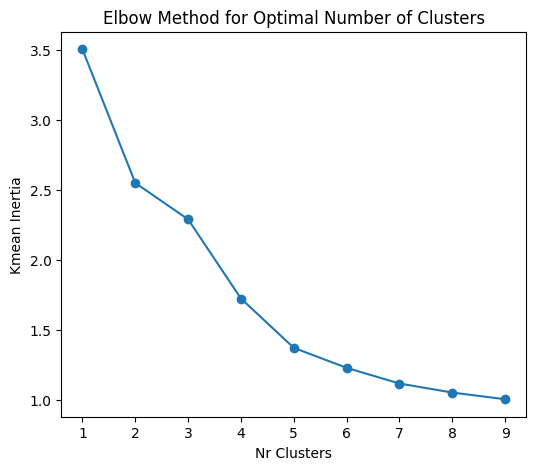

[0 0 0 0 4 4 4 0 0 0 4 4 0 0 0 4 0 0 0 0 3 0 0 0 0 3 0 0 4 3 0 0 0 0 0 0 0
 0 0 1 2 2 0 0 0 3 0 0 4 3 3 0 2 0 0 0 1 4 3 0 0 0 0 0 0 4 3 3 3 4 3 3 0 0
 0 0 0 4 3]


,PCA Component 1,PCA Component 2,PCA Component 3,Cluster,Species
0,-0.015904,0.063655,-0.016031,0,Asterionella glacialis
1,0.002306,0.034851,-0.067193,0,Ditylum brightwellii
2,-0.053170,0.033154,-0.071797,0,Eucampia zodiacus
3,-0.035848,0.031135,-0.036494,0,Guinardia delicatula
4,0.083146,0.105857,0.026645,4,Odontella aurita
...,...,...,...,...,...
74,-0.069809,-0.061869,-0.005296,0,Roperia tesselata
75,-0.042713,0.070739,-0.038592,0,Fibrocapsa japonica
76,-0.056716,0.019103,-0.106621,0,Heterosigma akashiwo
77,0.077866,0.223343,0.179602,4,Mediopyxis helysia


    PCA Component 1  PCA Component 2  PCA Component 3 Cluster  \
0         -0.015904         0.063655        -0.016031       0   
1          0.002306         0.034851        -0.067193       0   
2         -0.053170         0.033154        -0.071797       0   
3         -0.035848         0.031135        -0.036494       0   
4          0.083146         0.105857         0.026645       4   
..              ...              ...              ...     ...   
74        -0.069809        -0.061869        -0.005296       0   
75        -0.042713         0.070739        -0.038592       0   
76        -0.056716         0.019103        -0.106621       0   
77         0.077866         0.223343         0.179602       4   
78        -0.088435        -0.297037         0.205926       3   

                   Species  
0   Asterionella glacialis  
1     Ditylum brightwellii  
2        Eucampia zodiacus  
3     Guinardia delicatula  
4         Odontella aurita  
..                     ...  
74       Roperia

Cluster 0:
['Asterionella glacialis', 'Ditylum brightwellii', 'Eucampia zodiacus', 'Guinardia delicatula', 'Odontella sinensis', 'Rhaphoneis amphiceros', 'Rhizosolenia setigera', 'Thalassionema nitzschioides', 'Thalassiosira rotula', 'Diplopsalis lenticula', 'Guinardia flaccida', 'Gyrodinium spirale', 'Noctiluca scintillans', 'Protoperidinium bipes', 'Phaeocystis', 'Stephanopyxis turris', 'Katodinium glaucum', 'Oblea rotunda', 'Chaetoceros didymus', 'Coscinodiscus radiatus', 'Ceratium fusus', 'Coscinodiscus granii', 'Lauderia annulata', 'Protoperidinium claudicans', 'Prorocentrum micans', 'Podosira stelliger', 'Pseudopedinella', 'Chaetoceros densus', 'Actinocyclus octonarius', 'Protoperidinium conicum', 'Chaetoceros debilis', 'Coscinodiscus wailesii', 'Dinophysis acuminata', 'Prorocentrum triestinum', 'Protoperidinium steinii', 'Thalassiosira nordenskioeldii', 'Chaetoceros curvisetus', 'Pleurosigma angulatum', 'Protoperidinium subinerme', 'Chaetoceros eibenii', 'Navicula distans', 'Cha

In [13]:
plot_inertia(10)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(feature_vecs)
labels = kmeans.labels_
print(labels)

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(feature_vecs)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# colors = ['r', 'g', 'b', 'y', 'c', 'm']
# for i in range(n_clusters):
#     ax.scatter(reduced_features[labels == i, 0], reduced_features[labels == i, 1], reduced_features[labels == i, 2], 
#                color=colors[i], label=f'Cluster {i}')

# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# ax.legend()
# plt.title('K-means Clustering')
# plt.show()



df = pd.DataFrame(reduced_features, columns=['PCA Component 1', 'PCA Component 2', 'PCA Component 3'])
df['Cluster'] = labels.astype(str)

df['Species'] = normalized_phyto.index
display(df)
print(df)
fig = px.scatter_3d(df, x='PCA Component 1', y='PCA Component 2', z='PCA Component 3', color='Cluster', hover_name='Species')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()


phyto_clusters = []


for i in range(n_clusters):
    cluster_phytoplankton = [phytoplankton_columns[j] for j in range(len(labels)) if labels[j] == i]
    print(f"Cluster {i}:")
    phyto_clusters.append(cluster_phytoplankton)
    print(cluster_phytoplankton)
    print()

In [12]:
display(phyto_clusters)

clustered_dfs = {}
for i, group in enumerate(phyto_clusters):
    mask = normalized_phyto.index.isin(group)
    clustered_dfs[i] = normalized_phyto[mask]

clustered_dfs[2]

[['Asterionella glacialis',
  'Ditylum brightwellii',
  'Eucampia zodiacus',
  'Guinardia delicatula',
  'Odontella sinensis',
  'Rhaphoneis amphiceros',
  'Rhizosolenia setigera',
  'Thalassionema nitzschioides',
  'Thalassiosira rotula',
  'Diplopsalis lenticula',
  'Guinardia flaccida',
  'Gyrodinium spirale',
  'Noctiluca scintillans',
  'Protoperidinium bipes',
  'Phaeocystis',
  'Stephanopyxis turris',
  'Katodinium glaucum',
  'Oblea rotunda',
  'Chaetoceros didymus',
  'Coscinodiscus radiatus',
  'Ceratium fusus',
  'Coscinodiscus granii',
  'Lauderia annulata',
  'Protoperidinium claudicans',
  'Prorocentrum micans',
  'Podosira stelliger',
  'Pseudopedinella',
  'Chaetoceros densus',
  'Actinocyclus octonarius',
  'Protoperidinium conicum',
  'Chaetoceros debilis',
  'Coscinodiscus wailesii',
  'Dinophysis acuminata',
  'Prorocentrum triestinum',
  'Protoperidinium steinii',
  'Thalassiosira nordenskioeldii',
  'Chaetoceros curvisetus',
  'Pleurosigma angulatum',
  'Protoperi

Species,DANTZGT,DREISR,GOERE6,GROOTGND,HANSWGL,HUIBGOT,LODSGT,MARSDND,NOORDWK10,NOORDWK2,NOORDWK20,NOORDWK70,ROTTMPT3,ROTTMPT50,ROTTMPT70,SCHAARVODDL,SOELKKPDOT,TERSLG10,TERSLG100,TERSLG135,TERSLG175,TERSLG235,TERSLG4,VLISSGBISSVH,WALCRN2,WALCRN20,WALCRN70
Chaetoceros subtilis,0.009721,0.003195,0.003622,0.231284,0.207358,0.030128,0.004751,0.010698,0.022824,0.013650,0.016151,0.010406,0.010890,0.001155,0.001963,0.265352,0.000000,0.012475,0.009379,0.004856,0.006019,0.004436,0.010621,0.072923,0.017559,0.017063,0.001521
Melosira nummuloides,0.012469,0.009389,0.001825,0.467893,0.134856,0.009417,0.008154,0.007004,0.006935,0.006967,0.001700,0.002615,0.007815,0.000678,0.001062,0.253386,0.039090,0.002191,0.000000,0.000000,0.000000,0.000000,0.001386,0.021292,0.003140,0.000737,0.000000
Actinocyclus normanii,0.045648,0.010242,0.012502,0.084300,0.076451,0.050483,0.026043,0.042078,0.047411,0.046083,0.038683,0.015501,0.009221,0.000000,0.000000,0.370525,0.016847,0.015583,0.000000,0.003941,0.000000,0.000000,0.017112,0.046601,0.004992,0.015231,0.004523


Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']


Cluster 1: ['Pha']


Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']

In [13]:
unique_spec = {}
absent_spec = {}

total_species = set(phytoplankton_columns)

for i, df in clustered_dfs.items():
    current_species = set(df.index)

## FASTDTW

In [84]:
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data = pd.read_excel('../data/MERGED_DATA_INTERPOLATED2.xlsx')

In [104]:
# phytoplankton_columns = ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh']  # subset

phytoplankton_columns=['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Omo', 'Orh', 'Osi', 'Ram', 'Rse',
       'Tec', 'Tle', 'Tni', 'Tro', 'Dle', 'Etr', 'Gfl', 'Gsp', 'Nsc', 'Pbi',
       'Pbr', 'Pha', 'Stu', 'Kgl', 'Oro', 'Tor', 'Cdi', 'Cra', 'Ore', 'Ata',
       'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip',
       'Csu', 'Mnu', 'Pco', 'Cdeb', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi',
       'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu',
       'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Edu',
       'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']

abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]', 'PO4 [umol/L]', 'pH [DIMSLS]',
    'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]', 'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]',
    'kPAR_7d', 'kPAR_14d', 'DIN', 'DIN:SRP', 'DIN:SI', 'SRP:SI', 'IM [Jm2d]'
]

In [103]:
# Extract time series data for each phytoplankton type
time_series_data = [data[phytoplankton].dropna().values for phytoplankton in phytoplankton_columns]

df_abiotic_factors = data[abiotic_factors].copy()
# df_abiotic_factors.fillna(df_abiotic_factors.mean(), inplace=True)

# Convert abiotic factors to tensor for DTW computation
abiotic_data_tensor = df_abiotic_factors.values

phytoplankton_similarity_matrix = np.zeros((len(time_series_data), len(time_series_data)))


In [105]:
for i, series1 in enumerate(time_series_data):
    for j, series2 in enumerate(time_series_data):
        if i < j:
            distance, path = fastdtw(series1, series2)
            phytoplankton_similarity_matrix[i, j] = distance
            phytoplankton_similarity_matrix[j, i] = distance
        print(f"Pair ({i}, {j}) done - {int((i * len(time_series_data) + j) / ((len(time_series_data))**2) * 100)}%")


Pair (0, 0) done - 0%
Pair (0, 1) done - 0%
Pair (0, 2) done - 0%
Pair (0, 3) done - 0%
Pair (0, 4) done - 0%
Pair (0, 5) done - 0%
Pair (0, 6) done - 0%
Pair (0, 7) done - 0%
Pair (0, 8) done - 0%
Pair (0, 9) done - 0%
Pair (0, 10) done - 0%
Pair (0, 11) done - 0%
Pair (0, 12) done - 0%
Pair (0, 13) done - 0%
Pair (0, 14) done - 0%
Pair (0, 15) done - 0%
Pair (0, 16) done - 0%
Pair (0, 17) done - 0%
Pair (0, 18) done - 0%
Pair (0, 19) done - 0%
Pair (0, 20) done - 0%
Pair (0, 21) done - 0%
Pair (0, 22) done - 0%
Pair (0, 23) done - 0%
Pair (0, 24) done - 0%
Pair (0, 25) done - 0%
Pair (0, 26) done - 0%
Pair (0, 27) done - 0%
Pair (0, 28) done - 0%
Pair (0, 29) done - 0%
Pair (0, 30) done - 0%
Pair (0, 31) done - 0%
Pair (0, 32) done - 0%
Pair (0, 33) done - 0%
Pair (0, 34) done - 0%
Pair (0, 35) done - 0%
Pair (0, 36) done - 0%
Pair (0, 37) done - 0%
Pair (0, 38) done - 0%
Pair (0, 39) done - 0%
Pair (0, 40) done - 0%
Pair (0, 41) done - 0%
Pair (0, 42) done - 0%
Pair (0, 43) done - 0

/tmp/ipykernel_4474/1450431826.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(phytoplankton_similarity_matrix, method='single')


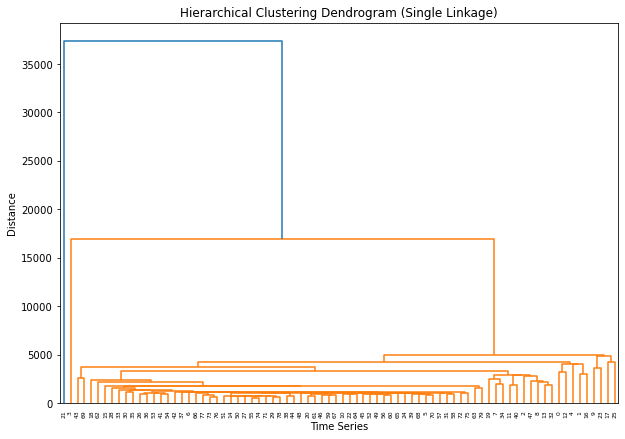

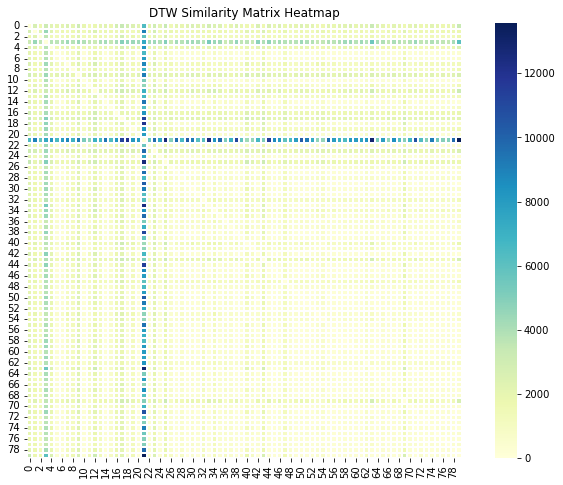

In [106]:
# Perform hierarchical clustering using the distance matrix
# Single-linkage clustering
linked = linkage(phytoplankton_similarity_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=np.arange(len(time_series_data)))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Time Series')
plt.ylabel('Distance')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phytoplankton_similarity_matrix, square=True, linewidths=0.1, cmap="YlGnBu", ax=ax)
plt.title('DTW Similarity Matrix Heatmap')
plt.show()

In [116]:
kmeans_model = KMeans(n_clusters = 3)
clusters = kmeans_model.fit_predict(phytoplankton_similarity_matrix)
print(clusters)

cluster_lists = [[] for _ in range(3)]
for i, cluster in enumerate(clusters):
 #  print(i, phytoplankton_columns[i], cluster)
    cluster_lists[cluster].append(phytoplankton_columns[i])

for i, cluster in enumerate(cluster_lists):
    print(f"Cluster {i}: {cluster}")


[2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 0 2 2 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0]
Cluster 0: ['Omo', 'Orh', 'Osi', 'Ram', 'Tec', 'Tle', 'Tro', 'Dle', 'Etr', 'Nsc', 'Pbi', 'Pbr', 'Stu', 'Oro', 'Cdi', 'Cra', 'Ore', 'Ata', 'Cfu', 'Cgr', 'Lan', 'Pcl', 'Pmi', 'Pos', 'Pse', 'Cden', 'Aco', 'Dip', 'Csu', 'Mnu', 'Pco', 'Cwa', 'Pba', 'Dac', 'Ptr', 'Lun', 'Nsi', 'Rst', 'Pst', 'Acn', 'Tno', 'Ccu', 'Pan', 'Gfa', 'Hta', 'Dsp', 'Psu', 'Cei', 'Ndi', 'Cda', 'Dro', 'Cha', 'Pac', 'Cau', 'Coc', 'Pte', 'Mpe', 'Pde', 'Plo', 'Dpu', 'Rte', 'Fja', 'Hak', 'Mhe', 'Dno', 'Dat']
Cluster 1: ['Pha']
Cluster 2: ['Agl', 'Dbr', 'Ezo', 'Gde', 'Oau', 'Rse', 'Tni', 'Gfl', 'Gsp', 'Kgl', 'Tor', 'Cdeb', 'Edu']


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [117]:
sil_score = silhouette_score(phytoplankton_similarity_matrix, clusters, metric="precomputed")
db_index = davies_bouldin_score(phytoplankton_similarity_matrix, clusters)
ch_score = calinski_harabasz_score(phytoplankton_similarity_matrix, clusters)

print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_score}')

Silhouette Score: 0.5391066061504406
Davies-Bouldin Index: 0.5190808127474345
Calinski-Harabasz Index: 151.59948076290186
